In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

from pandas_datareader import data as pdr
import yfinance as yfin

yfin.pdr_override()
%matplotlib inline

In [2]:
ticker = 'AMZN'
data = pd.DataFrame()
data[ticker] = pdr.get_data_yahoo(ticker, start='2010-1-1')["Adj Close"]
data.head()

[*********************100%***********************]  1 of 1 completed


,AMZN
Date,
2010-01-04,6.6950
2010-01-05,6.7345
2010-01-06,6.6125
2010-01-07,6.5000
2010-01-08,6.6760


In [3]:
log_returns = np.log(1+data.pct_change())
log_returns.head()

,AMZN
Date,
2010-01-04,NaN
2010-01-05,0.005883
2010-01-06,-0.018282
2010-01-07,-0.017160
2010-01-08,0.026717


C:\Users\LAMSD\my_app\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

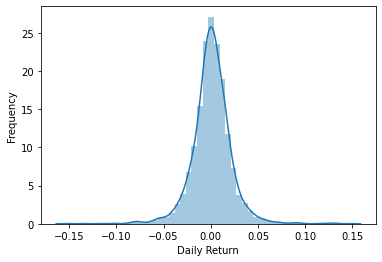

In [4]:
sns.distplot(log_returns.iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

<AxesSubplot:xlabel='Date'>

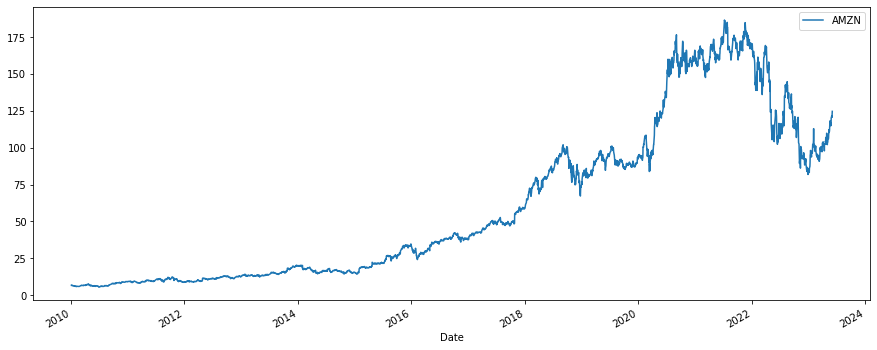

In [5]:
data.plot(figsize=(15,6))

<AxesSubplot:xlabel='Date'>

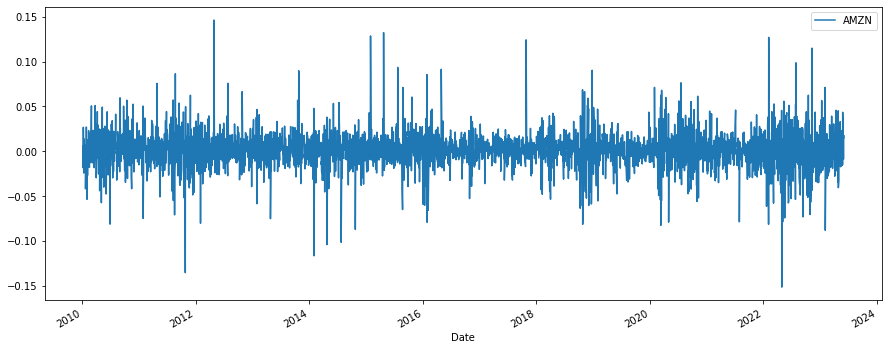

In [6]:
log_returns.plot(figsize=(15,6))

In [7]:
u = log_returns.mean()
var = log_returns.var()

$$
{drift} = {u} - \frac{1}{2} * {var}
$$

In [8]:
drift = u - (0.5*var)
drift

AMZN    0.000649
dtype: float64

In [9]:
stddev = log_returns.std()

In [10]:
x = np.random.rand(10,2)
x

array([[0.22431503, 0.95574249],
       [0.16472908, 0.64929994],
       [0.92216551, 0.9726273 ],
       [0.92240952, 0.53605446],
       [0.79108959, 0.74511254],
       [0.54347202, 0.34619045],
       [0.55290072, 0.789997  ],
       [0.08071651, 0.70314971],
       [0.85545017, 0.82299419],
       [0.43257125, 0.592368  ]])

In [11]:
norm.ppf(x)

array([[-0.7577009 ,  1.7032835 ],
       [-0.97520586,  0.38343113],
       [ 1.4197895 ,  1.92089137],
       [ 1.42146729,  0.09049852],
       [ 0.81020768,  0.65918821],
       [ 0.10918474, -0.39562607],
       [ 0.13299345,  0.80641085],
       [-1.4002682 ,  0.53348111],
       [ 1.0600988 ,  0.92683613],
       [-0.16983171,  0.2336406 ]])

In [12]:
Z = norm.ppf(np.random.rand(50,10000))
Z

array([[-2.41072623, -0.15895324,  1.16197312, ..., -1.46683428,
        -0.16579253, -0.13506908],
       [ 0.5545568 , -1.81388644, -1.15041848, ..., -1.11637225,
        -1.07283939,  0.45817827],
       [-1.44682517, -1.52884919,  0.6552254 , ..., -0.38724077,
        -0.83507383, -0.22243817],
       ...,
       [ 0.27479083,  0.04795096, -1.13866497, ...,  0.18455539,
        -0.35374488,  0.98679937],
       [-1.31054588, -1.30978338, -0.05226458, ..., -2.41560182,
         1.62752936, -1.69904202],
       [ 1.27006734,  0.98700934,  0.43393178, ...,  0.24851991,
        -0.19583465, -0.00320497]])

In [13]:
t_intervals = 1000
iterations = 10

$$
{daily}_{returns} = {e^r}
$$

$$
{r}={drift}+{stdev*z}
$$

In [14]:
daily_returns = np.exp(drift.values + stddev.values * norm.ppf(np.random.rand(50,1000)))

In [15]:
daily_returns

array([[0.99309508, 0.99841685, 1.00411965, ..., 0.98118675, 0.99266185,
        0.95934659],
       [1.00362693, 1.00398865, 1.02283862, ..., 1.00098777, 1.02397896,
        1.00099793],
       [0.99542654, 1.00197292, 0.9925079 , ..., 0.98346618, 1.00279679,
        1.0169765 ],
       ...,
       [1.0276328 , 1.01695893, 1.00343847, ..., 1.00263034, 0.98457433,
        0.98728757],
       [0.97543016, 0.98923206, 1.05431411, ..., 1.01274673, 1.02081033,
        0.97767527],
       [0.97252432, 0.97162874, 1.03231472, ..., 1.01400821, 0.99444379,
        0.98133894]])

---

In [16]:
S0 = data.iloc[-1]
S0

AMZN    124.635002
Name: 2023-06-02 00:00:00, dtype: float64

In [17]:
price_list = np.zeros_like(daily_returns)

In [18]:
price_list.shape

(50, 1000)

In [19]:
price_list[0] = S0
price_list

array([[124.63500214, 124.63500214, 124.63500214, ..., 124.63500214,
        124.63500214, 124.63500214],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [20]:
for t in range(1,50):
    price_list[t] = price_list[t-1]*daily_returns[t]

In [21]:
price_list.shape

(50, 1000)

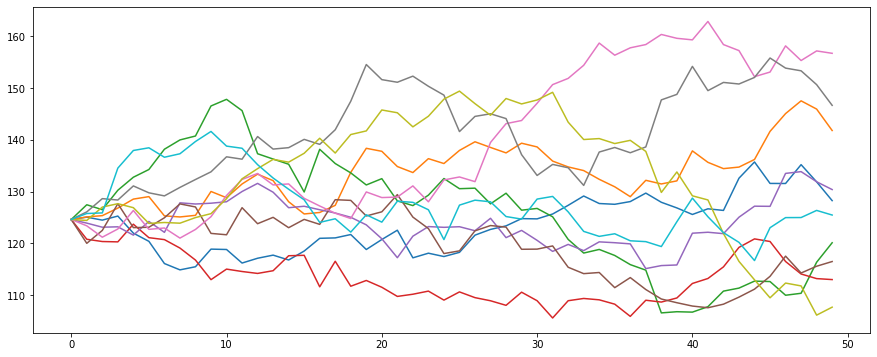

In [22]:
plt.figure(figsize=(15,6))
plt.plot(pd.DataFrame(price_list).iloc[:,0:10])

C:\Users\LAMSD\my_app\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Price after 50 days')

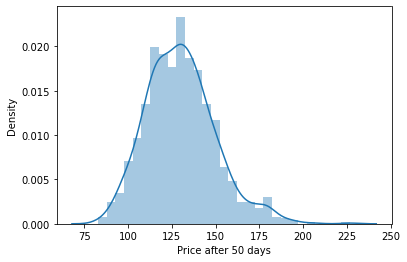

In [23]:
sns.distplot(pd.DataFrame(price_list).iloc[-1])
plt.xlabel("Price after 50 days")

In [24]:
df = pd.DataFrame(price_list)

In [25]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,124.635002,124.635002,124.635002,124.635002,124.635002,124.635002,124.635002,124.635002,124.635002,124.635002,...,124.635002,124.635002,124.635002,124.635002,124.635002,124.635002,124.635002,124.635002,124.635002,124.635002
1,125.087045,125.132127,127.481493,120.818636,123.935442,120.032782,123.409919,126.100881,124.450318,125.790835,...,120.850376,128.022962,125.260426,123.503337,122.708003,126.516245,122.313402,124.758113,127.623619,124.759379
2,124.514964,125.379003,126.526390,120.380178,123.144239,122.522586,121.216126,128.662830,127.033280,125.906245,...,118.465082,126.346146,125.470494,122.550932,126.040718,127.933998,121.756313,122.695384,127.980556,126.877356
3,125.295785,126.836866,130.281186,120.313824,123.221563,127.677641,122.800381,128.393335,127.684960,134.557151,...,118.382645,127.995432,125.036370,124.125365,124.618753,129.168328,118.874481,128.687423,129.437429,131.688950
4,122.000922,128.573598,132.797100,123.726490,121.618819,123.063007,126.373902,131.115643,126.916014,137.963389,...,116.876791,125.661723,125.863820,124.387632,122.804599,127.575638,122.669242,125.814551,128.554021,132.753283


In [26]:
import seaborn as sns

C:\Users\LAMSD\my_app\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


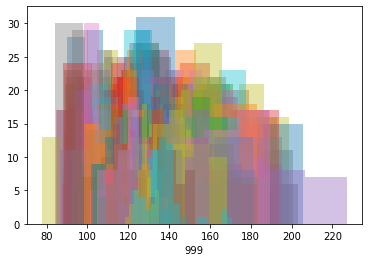

In [27]:
for i in range(len(df.columns)):
    sns.distplot(df[i], kde = False)